## Joker Reviews Analysis 
### This Notebook will conduct some simple EDA into reviews of the Joker and attempt to determine how succesful the TextBlob sentimental analysis library is in determining the score out of 10 given by each review 

First things first, scraping data from IMDB website

In [1]:
# import libraries 

import requests
from bs4 import BeautifulSoup
import pickle 
import pandas as pd

In [2]:
page = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=helpfulnessScore&dir=desc&ratingFilter=0').text
soup = BeautifulSoup(page,'lxml')

In [3]:
texty = [p.text for p in soup.find_all(class_ = 'text show-more__control')]

#find all reviews

In [4]:
score = [p.text for p in soup.find_all(class_ = 'ipl-ratings-bar')]

#parsing all scores

In [5]:
scores = []
for i in score:
    i = i[7:-5]
    scores.append(i)

    
#parsing scores so that only relevant part of string remains

In [6]:
reviews_imdb = pd.DataFrame(texty)
reviews_imdb = reviews_imdb.rename(columns={0: "Text"})

In [7]:
scores_imdb = pd.DataFrame(scores)
scores_imdb = scores_imdb.rename(columns={0: "Score out of 10"})

In [8]:
imdb = pd.concat([reviews_imdb,scores_imdb], axis = 1)

In [9]:
#change score column to integer

imdb['Score out of 10'] = pd.to_numeric(imdb["Score out of 10"])

## Exploratory Analysis 

In [10]:
import sklearn

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

#tokenise each review and count number of instances of words - ignoring pointless words such as the, and, in 

data_cv = cv.fit_transform(imdb.Text)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

#convert to visualisation 
data_dtm.head()

,10,100,2019,90,able,absolutely,absurd,accomplishes,account,achievement,...,worth,worthy,wouldn,writer,writing,wrong,year,years,yes,yesterday
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fx = pd.DataFrame(data_dtm.sum())

#summing dataframe to look for general trends in the language use in the reviews - bear in mind most reviews were
#very positive in this smaple - with the lowest still being 7/10

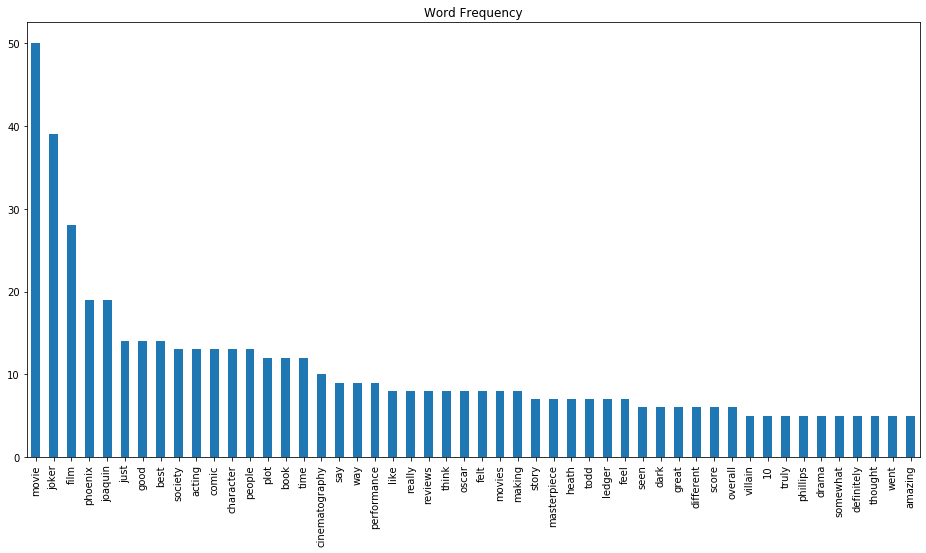

In [41]:
fx.sort_values(by = 0, ascending=False).head(50).plot.bar(figsize= (16,8), title ="Word Frequency", legend = None)

#visualise 

## Sentimental Analysis 

In [14]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity 

imdb["Polarity"] = imdb["Text"].apply(pol)
imdb["Subjectivity"] = imdb["Text"].apply(sub)

In [16]:
imdb.head(10)

,Text,Score out of 10,Polarity,Subjectivity
0,I was a person that saw all the hype and claim...,10,0.288235,0.647059
1,"Every once in a while a movie comes, that trul...",10,-0.025317,0.498730
2,This is a movie that only those who have felt ...,10,-0.031250,0.718750
3,"Truly a masterpiece, The Best Hollywood film o...",10,0.273750,0.581667
4,Joaquin Phoenix gives a tour de force performa...,10,-0.081481,0.705556
5,Most of the time movies are anticipated like t...,10,0.135294,0.485294
6,Let me start off by saying if Joaquin Phoneix ...,10,0.162500,0.675000
7,I get why some people hate this . It's because...,10,0.150000,0.580000
8,I have seen Joker yesterday at Venice an early...,10,0.130631,0.571772
9,It's sad that Joaquin missed Oscar for 'The gl...,10,0.244103,0.485641


In [17]:
imdb.iloc[2][0]

#closer look at review with low polarity score but 10/10 rating

'This is a movie that only those who have felt alone and isolated can truly relate to it. You understand the motive and you feel sorry for the character. A lot of people will see this movie and think that it encourages violence. But truly, this movie should encourage each and every one of us to become a better person, treat everyone with respect and make each other feel like they belong in this world, instead of making them feel isolated.'

In [18]:
imdb.iloc[1][0]

#closer look at reviews with lowe polarity score but 10/10 rating

"Every once in a while a movie comes, that truly makes an impact. Joaquin's performance and scenography in all it's brilliance. Grotesque, haunting and cringy. Hard to watch at times,... but so mesmerizing, you won't blink an eye watching it. Tragic, but with seriously funny moments. Emotional rollercoaster - sometimes, with multiple emotions popping-up at the same time.this is far from a typical action-riddled predictable super-hero movie - it's a proper psychological thriller/drama, with the single best character development I have ever seen."

In [19]:
imdb.iloc[13][0]

#closer look at reviews with low polarity scores but 9/10 rating

'The movie affects you in a way that makes it physically painful to experience, but in a good way.'

### Observation

There is some correlation between postive polarity and higher scores ( some of the lowest positive polarity results came from reviews that were not 10/10).

A major issue however is that the only reviews which returned negtive polarity (so should be the lowest scores) were all 10/10. 

There are three main issues which I think are making analysis difficult or less useful. 

1. Very little variance in score - almost all are 10/10 - there are no scores below 7/10. 
2. As these reviews are written by amateurs the text is often short and there is perhaps less consistence in how the text is then reflected in the score they give. Better results might be achieved looking at reviews written by professional reviewers as one might expect greater consitency in the correlation between their language and the score they give.
3. Because of the nature of the film, certain reviews (the ones which got negative polarity scores but were 10/10 reviews) use words such as 'grotesque', 'haunting' and 'painful'. This suggests that words which the model percieves as negative is skewing its interpretation of the reviews. It does not consider that humans can find it enjoyable to watch these things - as long as it does not happen to them in real life... 

### SOLUTION: GATHER BIGGER DATA SAMPLE WITH FULL RANGE OF SCORES

## Collecting bigger sample 

Not the most efficient method but will have to do for now. The following repeats the same code I wrote above to scrape reviews and their scores from IMDB. 

This gives a more complete dataset with roughly even distribution across the different scores. Each URl is the page for reviews of each of the scores. So one URL is for scores 1/10, another 2/10 and so on across 1/10-10/10.

THIS COULD'VE BEEN DONE MUCH MORE EFFICIENTLY, LESSON LEARNT

In [20]:
page1 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=1').text
soup1 = BeautifulSoup(page1,'lxml')
text1 = [p.text for p in soup1.find_all(class_ = 'text show-more__control')]
score1 = [p.text for p in soup1.find_all(class_ = 'ipl-ratings-bar')]

scores1 = []
for i in score1:
    i = i[7:-5]
    scores1.append(i)
    
reviews_imdb1 = pd.DataFrame(text1)
reviews_imdb1 = reviews_imdb1.rename(columns={0: "Text"})

scores_imdb1 = pd.DataFrame(scores1)
scores_imdb1 = scores_imdb1.rename(columns={0: "Score out of 10"})

imdb1_all = pd.concat([reviews_imdb1,scores_imdb1], axis = 1)

imdb1_all["Polarity"] = imdb1_all["Text"].apply(pol)
imdb1_all["Subjectivity"] = imdb1_all["Text"].apply(sub)
imdb1_all["Score out of 10"] = pd.to_numeric(imdb1_all["Score out of 10"])

In [21]:
page2 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=2').text
soup2 = BeautifulSoup(page2,'lxml')
text2 = [p.text for p in soup2.find_all(class_ = 'text show-more__control')]
score2 = [p.text for p in soup2.find_all(class_ = 'ipl-ratings-bar')]

scores2 = []
for i in score2:
    i = i[7:-5]
    scores2.append(i)
    
reviews_imdb2 = pd.DataFrame(text2)
reviews_imdb2 = reviews_imdb2.rename(columns={0: "Text"})

scores_imdb2 = pd.DataFrame(scores2)
scores_imdb2 = scores_imdb2.rename(columns={0: "Score out of 10"})

imdb2_all = pd.concat([reviews_imdb2,scores_imdb2], axis = 1)

imdb2_all["Polarity"] = imdb2_all["Text"].apply(pol)
imdb2_all["Subjectivity"] = imdb2_all["Text"].apply(sub)
imdb2_all["Score out of 10"] = pd.to_numeric(imdb2_all["Score out of 10"])

In [22]:
page3 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=3').text
soup3 = BeautifulSoup(page3,'lxml')
text3 = [p.text for p in soup3.find_all(class_ = 'text show-more__control')]
score3 = [p.text for p in soup3.find_all(class_ = 'ipl-ratings-bar')]

scores3 = []
for i in score3:
    i = i[7:-5]
    scores3.append(i)
    
reviews_imdb3 = pd.DataFrame(text3)
reviews_imdb3 = reviews_imdb3.rename(columns={0: "Text"})

scores_imdb3 = pd.DataFrame(scores3)
scores_imdb3 = scores_imdb3.rename(columns={0: "Score out of 10"})

imdb3_all = pd.concat([reviews_imdb3,scores_imdb3], axis = 1)

imdb3_all["Polarity"] = imdb3_all["Text"].apply(pol)
imdb3_all["Subjectivity"] = imdb3_all["Text"].apply(sub)
imdb3_all["Score out of 10"] = pd.to_numeric(imdb3_all["Score out of 10"])

In [23]:
page4 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=4').text
soup4 = BeautifulSoup(page4,'lxml')
text4 = [p.text for p in soup4.find_all(class_ = 'text show-more__control')]
score4 = [p.text for p in soup4.find_all(class_ = 'ipl-ratings-bar')]

scores4 = []
for i in score4:
    i = i[7:-5]
    scores4.append(i)
    
reviews_imdb4 = pd.DataFrame(text4)
reviews_imdb4 = reviews_imdb4.rename(columns={0: "Text"})


scores_imdb4 = pd.DataFrame(scores4)
scores_imdb4 = scores_imdb4.rename(columns={0: "Score out of 10"})

imdb4_all = pd.concat([reviews_imdb4,scores_imdb4], axis = 1)

imdb4_all["Polarity"] = imdb4_all["Text"].apply(pol)
imdb4_all["Subjectivity"] = imdb4_all["Text"].apply(sub)
imdb4_all["Score out of 10"] = pd.to_numeric(imdb4_all["Score out of 10"])

In [24]:
page5 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=5').text
soup5 = BeautifulSoup(page5,'lxml')
text5 = [p.text for p in soup5.find_all(class_ = 'text show-more__control')]
score5 = [p.text for p in soup5.find_all(class_ = 'ipl-ratings-bar')]

scores5 = []
for i in score5:
    i = i[7:-5]
    scores5.append(i)
    
reviews_imdb5 = pd.DataFrame(text5)
reviews_imdb5 = reviews_imdb5.rename(columns={0: "Text"})


scores_imdb5 = pd.DataFrame(scores5)
scores_imdb5 = scores_imdb5.rename(columns={0: "Score out of 10"})

imdb5_all = pd.concat([reviews_imdb5,scores_imdb5], axis = 1)

imdb5_all["Polarity"] = imdb5_all["Text"].apply(pol)
imdb5_all["Subjectivity"] = imdb5_all["Text"].apply(sub)
imdb5_all["Score out of 10"] = pd.to_numeric(imdb5_all["Score out of 10"])

In [25]:
page6 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=6').text
soup6 = BeautifulSoup(page6,'lxml')
text6 = [p.text for p in soup6.find_all(class_ = 'text show-more__control')]
score6 = [p.text for p in soup6.find_all(class_ = 'ipl-ratings-bar')]

scores6 = []
for i in score6:
    i = i[7:-5]
    scores6.append(i)
    
reviews_imdb6 = pd.DataFrame(text6)
reviews_imdb6 = reviews_imdb6.rename(columns={0: "Text"})


scores_imdb6 = pd.DataFrame(scores6)
scores_imdb6 = scores_imdb6.rename(columns={0: "Score out of 10"})

imdb6_all = pd.concat([reviews_imdb6,scores_imdb6], axis = 1)

imdb6_all["Polarity"] = imdb6_all["Text"].apply(pol)
imdb6_all["Subjectivity"] = imdb6_all["Text"].apply(sub)
imdb6_all["Score out of 10"] = pd.to_numeric(imdb6_all["Score out of 10"])

In [26]:
page7 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=7').text
soup7 = BeautifulSoup(page7,'lxml')
text7 = [p.text for p in soup7.find_all(class_ = 'text show-more__control')]
score7 = [p.text for p in soup7.find_all(class_ = 'ipl-ratings-bar')]

scores7 = []
for i in score7:
    i = i[7:-5]
    scores7.append(i)
    
reviews_imdb7 = pd.DataFrame(text7)
reviews_imdb7 = reviews_imdb7.rename(columns={0: "Text"})


scores_imdb7 = pd.DataFrame(scores7)
scores_imdb7 = scores_imdb7.rename(columns={0: "Score out of 10"})

imdb7_all = pd.concat([reviews_imdb7,scores_imdb7], axis = 1)

imdb7_all["Polarity"] = imdb7_all["Text"].apply(pol)
imdb7_all["Subjectivity"] = imdb7_all["Text"].apply(sub)
imdb7_all["Score out of 10"] = pd.to_numeric(imdb7_all["Score out of 10"])

In [27]:
page8 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=8').text
soup8 = BeautifulSoup(page8,'lxml')
text8 = [p.text for p in soup8.find_all(class_ = 'text show-more__control')]
score8 = [p.text for p in soup8.find_all(class_ = 'ipl-ratings-bar')]

scores8 = []
for i in score8:
    i = i[7:-5]
    scores8.append(i)
    
reviews_imdb8 = pd.DataFrame(text8)
reviews_imdb8 = reviews_imdb8.rename(columns={0: "Text"})


scores_imdb8 = pd.DataFrame(scores8)
scores_imdb8 = scores_imdb8.rename(columns={0: "Score out of 10"})

imdb8_all = pd.concat([reviews_imdb8,scores_imdb8], axis = 1)

imdb8_all["Polarity"] = imdb8_all["Text"].apply(pol)
imdb8_all["Subjectivity"] = imdb8_all["Text"].apply(sub)
imdb8_all["Score out of 10"] = pd.to_numeric(imdb8_all["Score out of 10"])

In [28]:
page9 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=9').text
soup9 = BeautifulSoup(page9,'lxml')
text9 = [p.text for p in soup9.find_all(class_ = 'text show-more__control')]
score9 = [p.text for p in soup9.find_all(class_ = 'ipl-ratings-bar')]

scores9 = []
for i in score9:
    i = i[7:-5]
    scores9.append(i)
    
reviews_imdb9 = pd.DataFrame(text9)
reviews_imdb9 = reviews_imdb9.rename(columns={0: "Text"})


scores_imdb9 = pd.DataFrame(scores9)
scores_imdb9 = scores_imdb9.rename(columns={0: "Score out of 10"})

imdb9_all = pd.concat([reviews_imdb9,scores_imdb9], axis = 1)

imdb9_all["Polarity"] = imdb9_all["Text"].apply(pol)
imdb9_all["Subjectivity"] = imdb9_all["Text"].apply(sub)
imdb9_all["Score out of 10"] = pd.to_numeric(imdb9_all["Score out of 10"])

In [29]:
page10 = requests.get('https://www.imdb.com/title/tt7286456/reviews?sort=reviewVolume&dir=desc&ratingFilter=10').text
soup10 = BeautifulSoup(page10,'lxml')
text10 = [p.text for p in soup10.find_all(class_ = 'text show-more__control')]
score10 = [p.text for p in soup10.find_all(class_ = 'ipl-ratings-bar')]

scores10 = []
for i in score10:
    i = i[7:-5]
    scores10.append(i)
    
reviews_imdb10 = pd.DataFrame(text10)
reviews_imdb10 = reviews_imdb10.rename(columns={0: "Text"})


scores_imdb10 = pd.DataFrame(scores10)
scores_imdb10 = scores_imdb10.rename(columns={0: "Score out of 10"})

imdb10_all = pd.concat([reviews_imdb10,scores_imdb10], axis = 1)

imdb10_all["Polarity"] = imdb10_all["Text"].apply(pol)
imdb10_all["Subjectivity"] = imdb10_all["Text"].apply(sub)
imdb10_all["Score out of 10"] = pd.to_numeric(imdb10_all["Score out of 10"])

In [30]:
import matplotlib.pyplot as plt

In [31]:
alls = imdb3_all.append([imdb1_all, imdb2_all, imdb3_all, imdb4_all , imdb5_all, imdb6_all, imdb7_all,
                        imdb8_all, imdb9_all, imdb10_all])

#combine all reviews and scores into dataframe

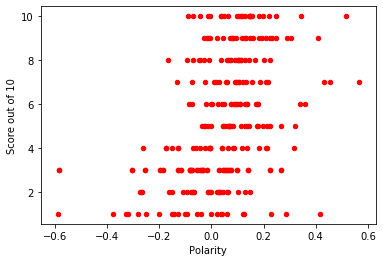

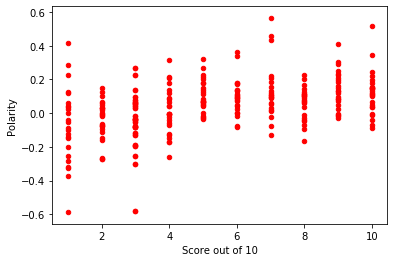

In [32]:
alls.plot(kind='scatter',x='Polarity',y='Score out of 10',color='red')

alls.plot(kind='scatter',x='Score out of 10',y='Polarity',color='red')

plt.show()

#visualising with axes switched over. Small positive correlation indicated in graphs

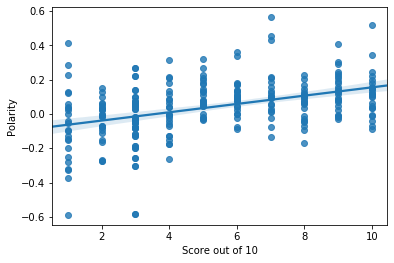

In [33]:
import seaborn as sns

sns.regplot(x='Score out of 10', y="Polarity", data=alls)

#with regression line - this is useful because it is hard to tell how many reviews are in the more concentrated parts,
#even though there are a lot of outliers, the majority seem to fall into this, albeit very weak, positive correlation

#the plot also tells us there is lower correlation for the lowest scores. Indicating that the
#model is least effective in these instances.

In [34]:
from scipy.stats import pearsonr

corr, _ = pearsonr(alls.dropna()["Score out of 10"], alls.dropna()['Polarity'])
print('Pearsons correlation: %.3f' % corr)

#drops any rows with nill values and find pearson correlation coefficient - there is a correlation albeit a weak one

Pearsons correlation: 0.422


In [35]:
from scipy.stats import spearmanr

corr, _ = spearmanr(alls.dropna()["Score out of 10"], alls.dropna()['Polarity'])
print('Spearmans correlation: %.3f' % corr)

#drops any rows with nill values and find spearmans correlation coefficient - there is a correlation albeit a weak one

Spearmans correlation: 0.445


### Initially my plan was to train a linear regression model which incorporated with TextBlob sentimental analysis could predict review scores. Given the relatively low correlation I think I need to go back to the drawing board. 

### Topic Analysis 

This section will explore whether we can discern distinguishable topics within the reviews. 

My hypothesis is that these could, if succesful, be something like: acting, cinemtography, the actor (phoenix), the director (phillips), mention of previous interpretations, the message of the movie. 

I expect the challenge to be that the since the reviews are quite short, there is less material for the model to learn from. 

In [36]:
from gensim import matutils, models
import scipy.sparse

unable to import 'smart_open.gcs', disabling that module


In [37]:
data_tdm = data_dtm.transpose()

#tranpose to have terms/words on rows index

In [38]:
data_tdm = scipy.sparse.csr_matrix(data_tdm)
data_tdm = matutils.Sparse2Corpus(data_tdm)

#convert to sparse matrix as per requirements of the model

In [39]:
id2word = dict((v,k) for k, v in cv.vocabulary_.items())

#another requirment of the model - each words needs to be located within the matrix

In [40]:
lda = models.LdaModel(corpus=data_tdm, id2word=id2word, num_topics=4, passes=30)
lda.print_topics()

#model does not seem to have worked very well on data set. My thinking is that the issue could be that the reviews
#repeat the same words a lot which is compounded by the relative shortness of the reviews themselves.

[(0,
  '0.022*"joker" + 0.022*"film" + 0.014*"movie" + 0.012*"comic" + 0.012*"book" + 0.012*"best" + 0.012*"joaquin" + 0.010*"phoenix" + 0.009*"cinematography" + 0.007*"making"'),
 (1,
  '0.037*"movie" + 0.022*"joker" + 0.011*"just" + 0.010*"phoenix" + 0.008*"like" + 0.008*"time" + 0.007*"felt" + 0.007*"joaquin" + 0.007*"character" + 0.007*"say"'),
 (2,
  '0.015*"good" + 0.015*"film" + 0.012*"reviews" + 0.012*"really" + 0.012*"people" + 0.012*"amazing" + 0.012*"think" + 0.009*"acting" + 0.009*"plot" + 0.009*"just"'),
 (3,
  '0.011*"performance" + 0.011*"movie" + 0.007*"joaquin" + 0.007*"phoenix" + 0.007*"makes" + 0.007*"dark" + 0.007*"action" + 0.007*"knight" + 0.007*"emotional" + 0.007*"portrayal"')]